In [614]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [615]:
df = pd.read_csv('glassdoor_jobs_cleaned.csv')
df.columns

Index(['company', 'job title', 'location', 'job description',
       'salary estimate', 'company_size', 'company_type', 'company_sector',
       'company_industry', 'company_founded', 'state code', 'company_age',
       'python', 'java', 'scala', 'hadoop', 'sql', 'spark', 'aws', 'azure',
       'gcp', 'airflow', 'snowflake', 'git'],
      dtype='object')

In [616]:
#Choose relevant columns
df_model  = df.drop(['company', 'job title', 'job description', 'location', 'company_founded'], axis=1)
df_model.columns

Index(['salary estimate', 'company_size', 'company_type', 'company_sector',
       'company_industry', 'state code', 'company_age', 'python', 'java',
       'scala', 'hadoop', 'sql', 'spark', 'aws', 'azure', 'gcp', 'airflow',
       'snowflake', 'git'],
      dtype='object')

In [617]:
#Get dummy variables
df_dum = pd.get_dummies(df_model, drop_first=True)

In [618]:
#Set features and target
X = df_dum.drop('salary estimate', axis=1).values
y = df_dum['salary estimate'].values

In [619]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [620]:
#Center and scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [621]:
# Linear Regression with statsmodels
import statsmodels.api as sm
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.431
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     2.070
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           1.54e-07
Time:                        18:42:41   Log-Likelihood:                -2156.5
No. Observations:                 457   AIC:                             4559.
Df Residuals:                     334   BIC:                             5066.
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.7512     37.259      1.711      0.088      -9.541     137.044
x1             0.0020      0.005      0.398      0.691      -0.008       0.012
x2            20.2185      4.085      4.950      0.000      12.183      28.254
x3            -1.3235      5.003     -0.265      0.792     -11.166       8.519
x4            -1.4783      4.850     -0.305      0.761     -11.019       8.063
x5             4.9209      5.754      0.855      0.393      -6.398      16.240
x6           -11.9983      4.071     -2.947      0.003     -20.007      -3.990
x7            -1.5530      5.254     -0.296      0.768     -11.888       8.783
x8            11.5583      4.478      2.581      0.010       2.750      20.367
x9            -7.8360      7.458     -1.051      0.294     -22.506       6.834
x10            2.4436     10.331      0.237      0.813     -17.878      22.765
x11           -8.8443     10.888     -0.812      0.417     -30.263      12.574
x12          -10.1676      9.560     -1.064      0.288     -28.973       8.637
x13           -7.8287      4.111     -1.904      0.058     -15.916       0.259
x14          -14.3841     23.055     -0.624      0.533     -59.735      30.967
x15           -7.3710     22.610     -0.326      0.745     -51.847      37.105
x16          -14.7245     22.503     -0.654      0.513     -58.990      29.541
x17          -23.5611     22.227     -1.060      0.290     -67.284      20.162
x18          -16.6026     22.983     -0.722      0.471     -61.813      28.608
x19          -21.0450     22.569     -0.932      0.352     -65.440      23.350
x20          -11.3354     22.486     -0.504      0.615     -55.568      32.897
x21            8.5864     23.606      0.364      0.716     -37.850      55.022
x22            4.9063     32.149      0.153      0.879     -58.334      68.147
x23           -6.6081     17.334     -0.381      0.703     -40.706      27.489
x24           -3.3885     17.702     -0.191      0.848     -38.209      31.432
x25          -13.4675     33.165     -0.406      0.685     -78.706      51.771
x26          -42.8622     25.888     -1.656      0.099     -93.786       8.061
x27          -22.0550     18.630     -1.184      0.237     -58.702      14.592
x28          -37.3982     28.296     -1.322      0.187     -93.060      18.263
x29          -36.4741     36.604     -0.996      0.320    -108.477      35.529
x30            5.2946     18.758      0.282      0.778     -31.604      42.193
x31           51.6155     48.326      1.068      0.286     -43.446     146.677
x32           -4.7784     19.273     -0.248      0.804     -42.690      33.133
x33            2.0917     11.333      0.185      0.854     -20.201      24.384
x34            9.3464     20.705      0.451      0.652     -31.382      50.075
x35          -25.8307     19.333     -1.336      0.182     -63.861      12.199
x3

In [622]:
#Linear regression with scikit learn
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
y_pred_lr = reg.predict(X_test_scaled)
r_squared = reg.score(X_test_scaled, y_test)
rmse = mean_squared_error(y_test, y_pred_lr, squared = False)
print("R^2 :{}".format(r_squared))
print("RMSE :{}".format(rmse))


R^2 :-1.077290858159147e+28
RMSE :3182004148448576.0


In [623]:
#Linear regression cross-validation
kf = KFold(n_splits=6, shuffle=True, random_state=15)
reg = LinearRegression()
#Compute 6-Fold cross-validation scores
lr_errors = cross_val_score(reg, X_train_scaled, y_train,scoring = 'neg_mean_squared_error',  cv=kf)
#Print RMSE
rmse_lr = np.sqrt(-lr_errors)
print("Average RMSE for LR :{}".format(np.mean(rmse_lr)))


Average RMSE for LR :4600343656499180.0


Average RMSE for Ridge :33.88215145349701


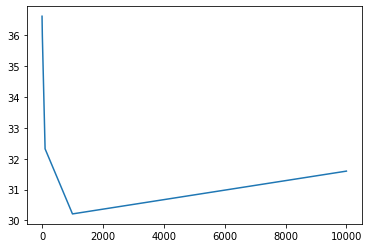

In [624]:
#Regulized regression
#Ridge regression
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_errors = []
for alpha in alphas:
    #Create a ridge regrssion
    ridge = Ridge(alpha)
    #Fit the data
    ridge.fit(X_train_scaled, y_train)
    #Predict the outputs
    y_pred_ridge = ridge.predict(X_test_scaled)
    #Obtain RMSE
    error = mean_squared_error(y_test, y_pred_ridge, squared=False)
    ridge_errors.append(error)
print("Average RMSE for Ridge :{}".format(np.mean(ridge_errors)))
plt.plot(alphas, ridge_errors)


In [625]:
#Lasso regression
#Lasso regression cross-validation
#Intantiate a lasso regression model
lasso = Lasso(alpha=0.3)
#compute 6-Fold cross-validation scores
lasso_errors = cross_val_score(lasso, X_train_scaled, y_train,  scoring = 'neg_mean_squared_error', cv=kf)
#print RMSE
rmse_lasso = np.sqrt(-lasso_errors)
print("Average RMSE for Lasso:{}".format(np.mean(rmse_lasso)))

Average RMSE for Lasso:36.7025842702664


In [626]:
#Random Forest Regressor
#Intantiate a RandomForestRegressor model
rf = RandomForestRegressor()
#Create a GridSearchCV object to perform cross-validation
params = {'n_estimators':range(10,300,10), 'max_features':['auto','sqrt','log2']}
tuning = GridSearchCV(rf, param_grid=params)
tuning.fit(X_train_scaled, y_train)
y_pred_rf = tuning.best_estimator_.predict(X_test_scaled)
# Compute and print RMSE
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print("RMSE for RF:{}".format(np.mean(rmse_rf)))

c:\Users\ft_ha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
145 fits failed out of a total of 435.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
145 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ft_ha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ft_ha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\ft_ha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py"

RMSE for RF:31.47157721981671
